In [1]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [3]:
patients = pd.read_csv('train_data_tree.csv')

In [4]:
patients.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [5]:
clf = tree.DecisionTreeClassifier()
parametrs = {'criterion': ['entropy'], 'max_depth': range(1, 10), 'min_samples_split' : range(2,10)}

In [6]:
grid_search_cv = GridSearchCV(clf, parametrs)

In [7]:
X = patients.drop(['num'], axis=1)
y = patients.num

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [9]:
grid_search_cv.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [10]:
# best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
best_clf = grid_search_cv.best_estimator_

In [11]:
# best_clf.fit(X,y)

[Text(0.5, 0.75, 'x[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(0.25, 0.25, 'entropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(0.75, 0.25, 'entropy = 0.826\nsamples = 81\nvalue = [21, 60]')]

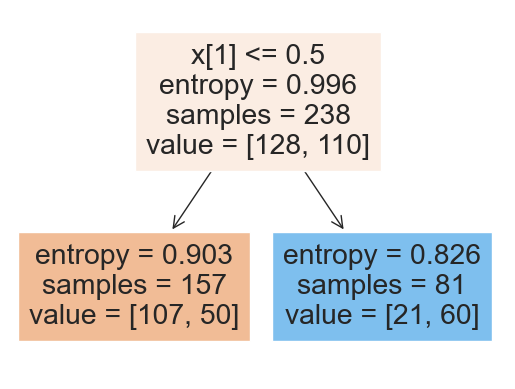

In [12]:
tree.plot_tree(best_clf, filled=True)

In [13]:
l_node = best_clf.tree_.children_left[0] # индекс корня левого поддерева
n1 = best_clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
e1 = best_clf.tree_.impurity[l_node] # энтропия в корне левого поддерева

In [14]:
r_node = best_clf.tree_.children_right[0] # индекс корня левого поддерева
n2 = best_clf.tree_.n_node_samples[r_node] # сэмплов в левом поддереве
e2 = best_clf.tree_.impurity[r_node] # энтропия в корне левого поддерева

In [15]:
n = 238

In [16]:
ig = 0.996 - n1 / n * e1 + n2 / n * e2

In [17]:
ig

0.6815044877162313

In [18]:
from sklearn.datasets import load_iris

In [19]:
iris = load_iris()

In [20]:
X = iris.data
y = iris.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [22]:
clf = tree.DecisionTreeClassifier()

In [23]:
grid_search_cv = GridSearchCV(clf, parametrs)

In [24]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [25]:
grid_search_cv.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

In [26]:
best_clf = grid_search_cv.best_estimator_

[Text(0.375, 0.875, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 112\nvalue = [39, 38, 35]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.85\nentropy = 0.999\nsamples = 73\nvalue = [0, 38, 35]'),
 Text(0.25, 0.375, 'x[0] <= 4.95\nentropy = 0.176\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.125, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.75, 0.375, 'x[3] <= 1.55\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

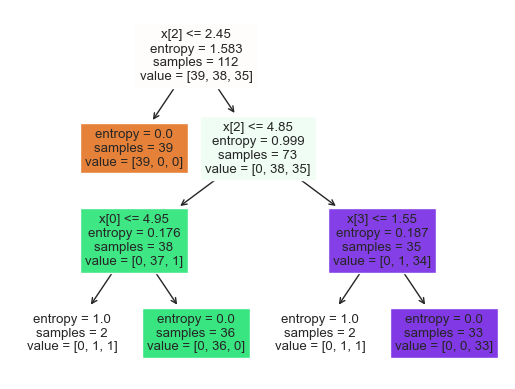

In [27]:
tree.plot_tree(best_clf, filled=True)

In [28]:
y_predicted = best_clf.predict(X_test)

In [29]:
precision_score(y_test, y_predicted, average='micro')

0.8421052631578947

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
randomized_search_cv = RandomizedSearchCV(clf, parametrs)

In [32]:
randomized_search_cv.fit(X, y)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy'],
                                        'max_depth': range(1, 10),
                                        'min_samples_split': range(2, 10)})

In [33]:
best_slf_2 = randomized_search_cv.best_estimator_

[Text(0.4444444444444444, 0.9, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5555555555555556, 0.7, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3333333333333333, 0.5, 'x[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.2222222222222222, 0.3, 'x[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.7777777777777778, 0.5, 'x[2] <= 4.85\nentropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.8888888888888888, 0.3, 'entropy = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

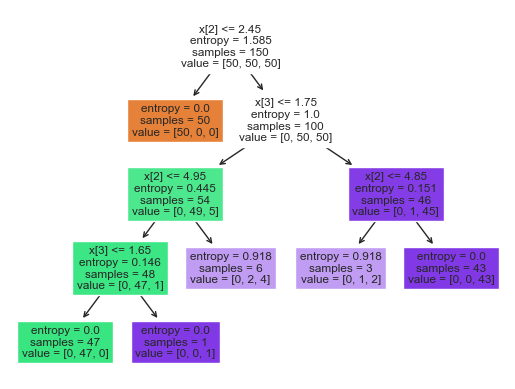

In [34]:
tree.plot_tree(best_slf_2, filled=True)

[Text(0.375, 0.875, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 112\nvalue = [39, 38, 35]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.85\nentropy = 0.999\nsamples = 73\nvalue = [0, 38, 35]'),
 Text(0.25, 0.375, 'x[0] <= 4.95\nentropy = 0.176\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.125, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.75, 0.375, 'x[3] <= 1.55\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

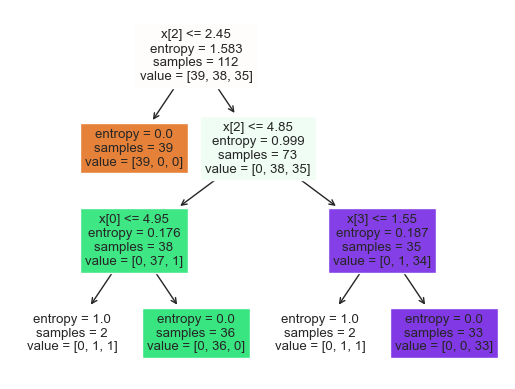

In [35]:
tree.plot_tree(best_clf, filled=True)

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [37]:
conf_matrix = confusion_matrix(y_test, y_predicted)

In [38]:
disp = ConfusionMatrixDisplay(conf_matrix)

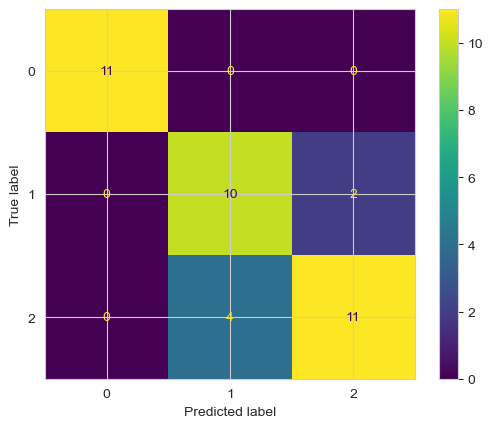

In [39]:
disp.plot()

In [40]:
from sklearn.metrics import classification_report

In [41]:
# report = classification_report(y_test, y_test, target_names=['0', '1'])

In [42]:
y_test

array([1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1,
       0, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 2, 1])

In [43]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 15), 'min_samples_split': range(2, 50, 5), 'min_samples_leaf': range(2, 50, 5)}

In [44]:
grid_search_cv = GridSearchCV(clf, parametrs)

In [45]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15),
                         'min_samples_leaf': range(2, 50, 5),
                         'min_samples_split': range(2, 50, 5)})

In [46]:
best_slf_2 = grid_search_cv.best_estimator_

In [47]:
grid_search_cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 7}

[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [39, 38, 35]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.85\ngini = 0.499\nsamples = 73\nvalue = [0, 38, 35]'),
 Text(0.25, 0.375, 'x[3] <= 1.65\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.375, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.75, 0.375, 'x[3] <= 1.55\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

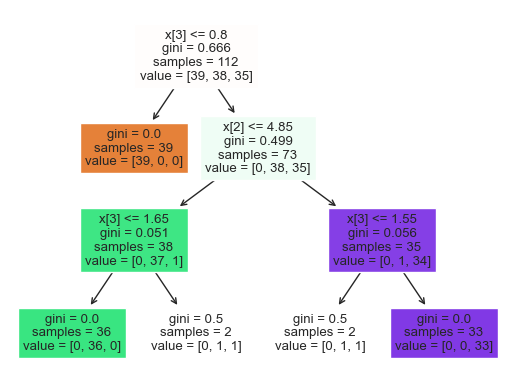

In [48]:
tree.plot_tree(best_slf_2, filled=True)

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
clf_rf = RandomForestClassifier()

In [51]:
parametrs = {'n_estimators' : [10, 20, 30], 'max_depth' : [2, 5, 7, 10]}

In [52]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [53]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [54]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [55]:
best_clf = grid_search_cv_clf.best_estimator_

In [56]:
best_clf.score(X_test, y_test)

0.868421052631579

In [57]:
feature_importance = best_clf.feature_importances_

In [58]:
feature_importance_df = pd.DataFrame({'features' : [0, 1, 2, 3],
                                      'feature_importances' : feature_importance})

In [59]:
feature_importance_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
2,2,0.466824
3,3,0.456301
0,0,0.061377
1,1,0.015499


In [60]:
list(X_train)

[array([5.5, 3.5, 1.3, 0.2]),
 array([7.4, 2.8, 6.1, 1.9]),
 array([5.8, 2.7, 5.1, 1.9]),
 array([4.9, 3.1, 1.5, 0.2]),
 array([6.4, 3.2, 4.5, 1.5]),
 array([5.8, 2.7, 5.1, 1.9]),
 array([5. , 3.4, 1.6, 0.4]),
 array([5.1, 3.4, 1.5, 0.2]),
 array([6.8, 2.8, 4.8, 1.4]),
 array([7.9, 3.8, 6.4, 2. ]),
 array([6.9, 3.1, 5.1, 2.3]),
 array([5.8, 2.8, 5.1, 2.4]),
 array([6.3, 2.8, 5.1, 1.5]),
 array([6.3, 2.3, 4.4, 1.3]),
 array([7.2, 3.6, 6.1, 2.5]),
 array([5.7, 2.6, 3.5, 1. ]),
 array([7.2, 3. , 5.8, 1.6]),
 array([6.3, 3.3, 6. , 2.5]),
 array([4.9, 3. , 1.4, 0.2]),
 array([6. , 3.4, 4.5, 1.6]),
 array([6.5, 3. , 5.8, 2.2]),
 array([5.4, 3.9, 1.7, 0.4]),
 array([5.8, 4. , 1.2, 0.2]),
 array([6.5, 3. , 5.2, 2. ]),
 array([5.5, 4.2, 1.4, 0.2]),
 array([5.5, 2.4, 3.7, 1. ]),
 array([5.7, 2.8, 4.5, 1.3]),
 array([4.8, 3.4, 1.9, 0.2]),
 array([6.8, 3. , 5.5, 2.1]),
 array([6.1, 2.9, 4.7, 1.4]),
 array([5. , 3.6, 1.4, 0.2]),
 array([4.9, 3.1, 1.5, 0.1]),
 array([5.7, 2.5, 5. , 2. ]),
 array([5.

In [61]:
X_train

array([[5.5, 3.5, 1.3, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [5.8, 2.7, 5.1, 1.9],
       [4.9, 3.1, 1.5, 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [5.8, 2.7, 5.1, 1.9],
       [5. , 3.4, 1.6, 0.4],
       [5.1, 3.4, 1.5, 0.2],
       [6.8, 2.8, 4.8, 1.4],
       [7.9, 3.8, 6.4, 2. ],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.8, 5.1, 2.4],
       [6.3, 2.8, 5.1, 1.5],
       [6.3, 2.3, 4.4, 1.3],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.6, 3.5, 1. ],
       [7.2, 3. , 5.8, 1.6],
       [6.3, 3.3, 6. , 2.5],
       [4.9, 3. , 1.4, 0.2],
       [6. , 3.4, 4.5, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.4, 3.9, 1.7, 0.4],
       [5.8, 4. , 1.2, 0.2],
       [6.5, 3. , 5.2, 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [5.7, 2.8, 4.5, 1.3],
       [4.8, 3.4, 1.9, 0.2],
       [6.8, 3. , 5.5, 2.1],
       [6.1, 2.9, 4.7, 1.4],
       [5. , 3.6, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.7, 2.5, 5. , 2. ],
       [5.7, 2.9, 4.2, 1.3],
       [6.4, 2

In [62]:
url = "https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv"

df = pd.read_csv(url)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [87]:
rf = RandomForestClassifier(10, max_depth=5)

In [88]:
X = df.drop(['target'], axis=1)

In [89]:
y = df.target

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=np.random.seed(0))

In [91]:
# rf.fit(X_train, y_train)
rf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [81]:
# rf.score(X_test, y_test)

0.78

In [92]:
feature_importance = rf.feature_importances_

In [93]:
feature_importance_df = pd.DataFrame({'features' : list(X_test),
                                      'feature_importances' : feature_importance})

In [94]:
feature_importance_df

,features,feature_importances
0,age,0.082731
1,sex,0.025392
2,cp,0.219429
3,trestbps,0.033218
4,chol,0.022408
5,fbs,0.003749
6,restecg,0.008187
7,thalach,0.124493
8,exang,0.062589
9,oldpeak,0.146552


<Axes: >

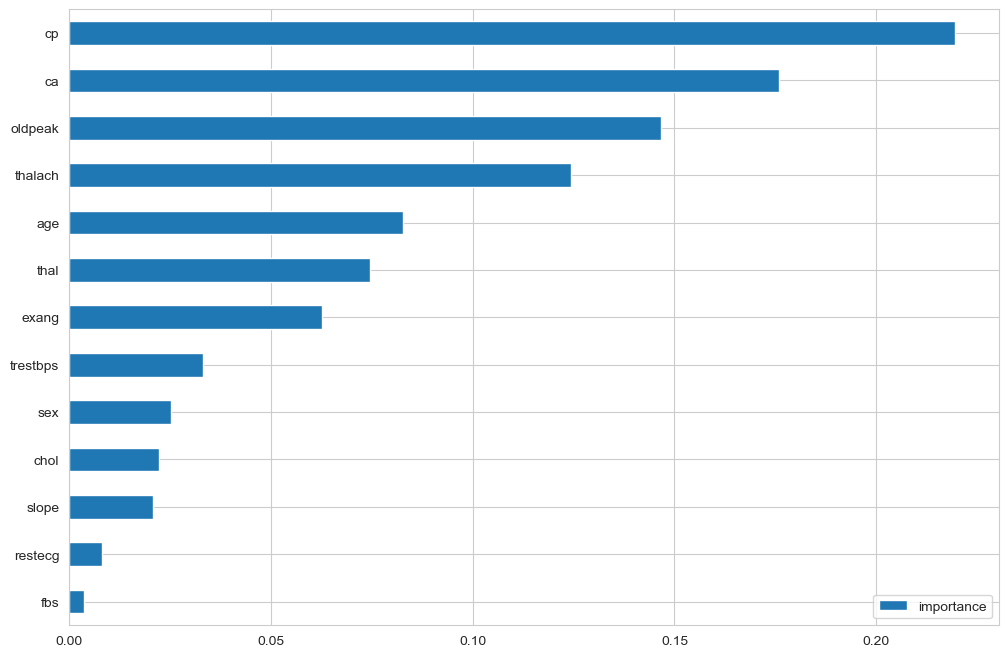

In [95]:
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

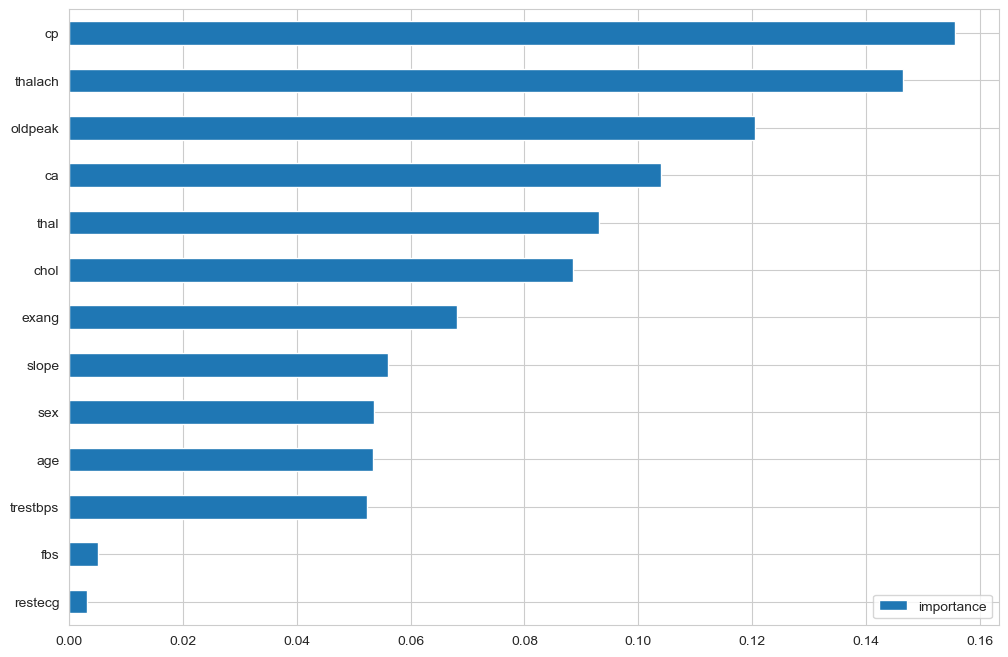

In [96]:
# Считываем файл c данными о сердечных заболеваниях.
heart_data = pd.read_csv(url)

# Отбросим колонку, которую будем предсказывать.
X = heart_data.drop(['target'], axis=1)
# Создадим переменную, которую будем предсказывать.
y = heart_data.target

# Разбиваем DataFrame на подмножества test и train в пропорции 0.33-test, а остальное - train.
rs = np.random.seed(0)
X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(X, y, train_size=0.33, random_state=rs)

# Создаем модель RandomForestClassifier.
rf_heart = RandomForestClassifier()

# Задаем параметры модели.
parametrs = {'n_estimators': [10], 'max_depth': [5]}

# Обучение Random forest моделей GridSearchCV на подмножестве train.
GridSearchCV_heart_clf = GridSearchCV(rf_heart, parametrs, cv=5)
GridSearchCV_heart_clf.fit(X_heart_train, y_heart_train)

# Проведем преобразование, позволяющее определить важность переменных.
best_heart_clf = GridSearchCV_heart_clf.best_estimator_

# Создадим атрибут feature_importances_heart и сохраним его в отдельную переменную.
feature_importances_heart = best_heart_clf.feature_importances_

# Создадим DataFrame с информацией о важности переменных.
feature_importances_heart_df = pd.DataFrame({'feature_importances': feature_importances_heart},
                                            index=X_heart_train.columns) \
    .sort_values(by='feature_importances', ascending=True) \
    .rename(columns={'feature_importances': 'importance'})

# Построение графика важности переменных.
feature_importances_heart_df.plot(kind='barh', figsize=(12, 8))
plt.show()